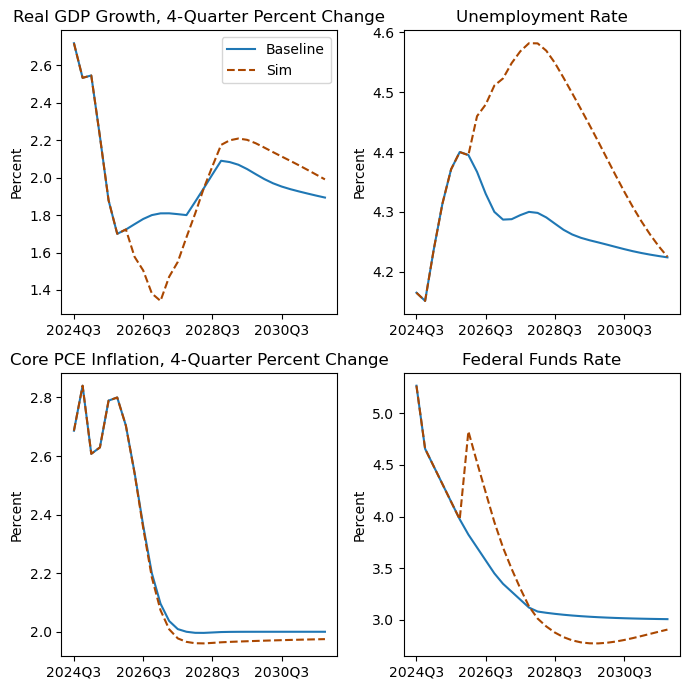

In [ ]:
# example 1
import pandas
 
from pyfrbus.frbus import Frbus
from pyfrbus.sim_lib import sim_plot
from pyfrbus.load_data import load_data
 
 
# Load data
data = load_data("data/LONGBASE.TXT")
 
# Load model
frbus = Frbus("models/model.xml")
 
# Specify dates
start = pandas.Period("2040Q1")
end = start + 23
 
# Standard configuration, use surplus ratio targeting
data.loc[start:end, "dfpdbt"] = 0
data.loc[start:end, "dfpsrp"] = 1
 
# Solve to baseline with adds
with_adds = frbus.init_trac(start, end, data)
 
# 100 bp monetary policy shock and solve
with_adds.loc[start, "rffintay_aerr"] += 1
sim = frbus.solve(start, end, with_adds)
 
# View results
sim_plot(with_adds, sim, start, end)

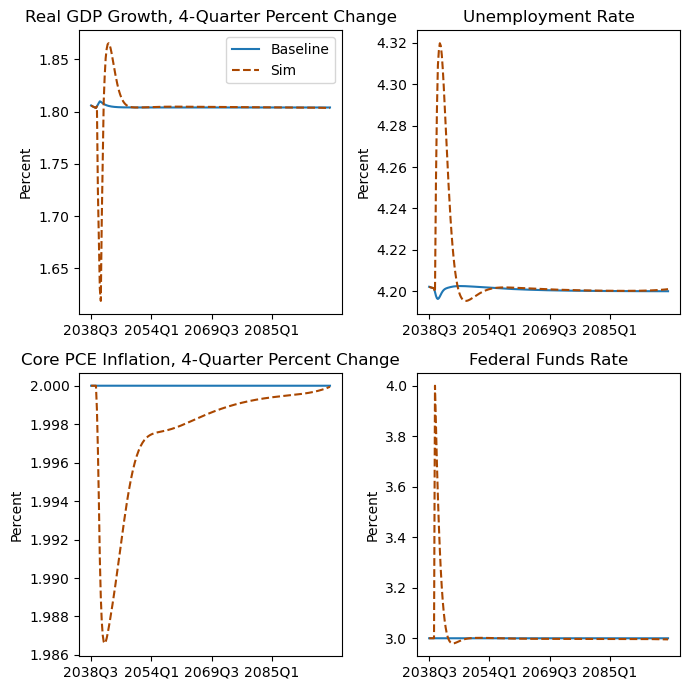

In [3]:
# example 2
import pandas
 
from pyfrbus.frbus import Frbus
from pyfrbus.sim_lib import sim_plot
from pyfrbus.load_data import load_data
 
 
# Load data
data = load_data("data/LONGBASE.TXT")
 
# Load model
frbus = Frbus("models/model.xml", mce="mcap+wp")
 
# Specify dates
start = pandas.Period("2040q1")
end = start + 60 * 4
 
# Standard MCE configuration, use surplus ratio targeting, rstar endogenous in long run
data.loc[start:end, "dfpdbt"] = 0
data.loc[start:end, "dfpsrp"] = 1
data.loc[start:end, "drstar"] = 0
data.loc[(start + 39) : end, "drstar"] = 1
 
# Solve to baseline with adds
with_adds = frbus.init_trac(start, end, data)
 
# 100 bp monetary policy shock and solve
with_adds.loc[start, "rffintay_aerr"] += 1
sim = frbus.solve(start, end, with_adds)
 
# View results
sim_plot(with_adds, sim, start, end)

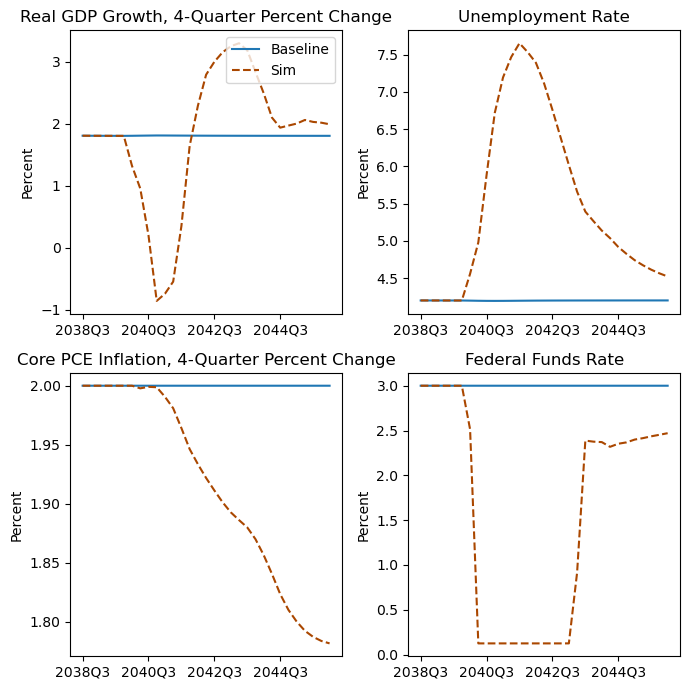

In [4]:
# example 3
import pandas
 
from pyfrbus.frbus import Frbus
from pyfrbus.sim_lib import sim_plot
from pyfrbus.load_data import load_data
from pyfrbus.time_series_data import TimeSeriesData
 
 
# Load data
data = load_data("data/LONGBASE.TXT")
 
# Load model
frbus = Frbus("models/model.xml")
 
# Specify dates
start = pandas.Period("2040Q1")
end = start + 24
 
# Standard configuration, use surplus ratio targeting
data.loc[start:end, "dfpdbt"] = 0
data.loc[start:end, "dfpsrp"] = 1
 
# Use non-inertial Taylor rule
data.loc[start:end, "dmptay"] = 1
data.loc[start:end, "dmpintay"] = 0
 
# Enable thresholds
data.loc[start:end, "dmptrsh"] = 1
# Arbitrary threshold values
data.loc[start:end, "lurtrsh"] = 6.0
data.loc[start:end, "pitrsh"] = 3.0
 
# Solve to baseline with adds
with_adds = frbus.init_trac(start, end, data)
 
# Zero tracking residuals for funds rate and thresholds
with_adds.loc[start:end, "rfftay_trac"] = 0
with_adds.loc[start:end, "rffrule_trac"] = 0
with_adds.loc[start:end, "rff_trac"] = 0
with_adds.loc[start:end, "dmptpi_trac"] = 0
with_adds.loc[start:end, "dmptlur_trac"] = 0
with_adds.loc[start:end, "dmptmax_trac"] = 0
with_adds.loc[start:end, "dmptr_trac"] = 0
 
# Shocks vaguely derived from historical residuals
with_adds.loc[start : start + 3, "eco_aerr"] = [-0.002, -0.0016, -0.0070, -0.0045]
with_adds.loc[start : start + 3, "ecd_aerr"] = [-0.0319, -0.0154, -0.0412, -0.0838]
with_adds.loc[start : start + 3, "eh_aerr"] = [-0.0512, -0.0501, -0.0124, -0.0723]
with_adds.loc[start : start + 3, "rbbbp_aerr"] = [0.3999, 2.7032, 0.3391, -0.7759]
with_adds.loc[start : start + 8, "lhp_aerr"] = [
    -0.0029,
    -0.0048,
    -0.0119,
    -0.0085,
    -0.0074,
    -0.0061,
    -0.0077,
    -0.0033,
    -0.0042,
]
 
# Set up time-series object
d = TimeSeriesData(with_adds)
# Set range
d.range = pandas.period_range(start + 4, end)
# Roll off residuals with 0.5 persistence
rho = 0.5
d.eco_aerr = rho * d.eco_aerr(-1)
d.ecd_aerr = rho * d.ecd_aerr(-1)
d.eh_aerr = rho * d.eh_aerr(-1)
d.rbbbp_aerr = rho * d.rbbbp_aerr(-1)
d.range = pandas.period_range(start + 9, end)
d.lhp_aerr = rho * d.lhp_aerr(-1)
 
# Adds so that thresholds do not trigger before shocks are felt
with_adds.loc[start, "dmptr_aerr"] = -1
with_adds.loc[start : start + 2, "dmptlur_aerr"] = -1
 
# Solve
sim = frbus.solve(start, end, with_adds)
 
# View results, unemployment threshold binds
sim_plot(with_adds, sim, start, end)

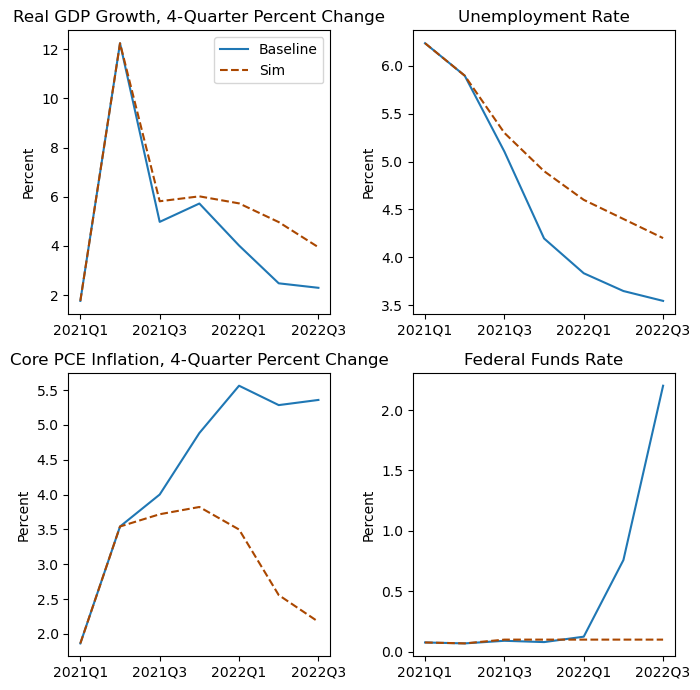

In [5]:
# example 4
import pandas
from numpy import array, cumprod
 
from pyfrbus.frbus import Frbus
from pyfrbus.sim_lib import sim_plot
from pyfrbus.load_data import load_data
 
 
# Load data
data = load_data("data/LONGBASE.TXT")
 
# Load model
frbus = Frbus("models/model.xml")
 
# Specify dates
start = pandas.Period("2021Q3")
end = "2022Q3"
 
# Standard configuration, use surplus ratio targeting
data.loc[start:end, "dfpdbt"] = 0
data.loc[start:end, "dfpsrp"] = 1
 
# Solve to baseline with adds
with_adds = frbus.init_trac(start, end, data)
 
# Scenario based on 2021Q3 Survey of Professional Forecasters
with_adds.loc[start:end, "lurnat"] = 3.78
 
# Set up trajectories for mcontrol
with_adds.loc[start:end, "lur_t"] = [5.3, 4.9, 4.6, 4.4, 4.2]
with_adds.loc[start:end, "picxfe_t"] = [3.7, 2.2, 2.1, 2.1, 2.2]
with_adds.loc[start:end, "rff_t"] = [0.1, 0.1, 0.1, 0.1, 0.1]
with_adds.loc[start:end, "rg10_t"] = [1.4, 1.6, 1.6, 1.7, 1.9]
 
# Get GDP level as accumulated growth from initial period
gdp_growth = cumprod((array([6.8, 5.2, 4.5, 3.4, 2.7]) / 100 + 1) ** 0.25)
with_adds.loc[start:end, "xgdp_t"] = with_adds.loc[start - 1, "xgdp"] * gdp_growth
 
targ = ["xgdp", "lur", "picxfe", "rff", "rg10"]
traj = ["xgdp_t", "lur_t", "picxfe_t", "rff_t", "rg10_t"]
inst = ["eco_aerr", "lhp_aerr", "picxfe_aerr", "rff_aerr", "rg10p_aerr"]
 
# Run mcontrol
sim = frbus.mcontrol(start, end, with_adds, targ, traj, inst)
 
# View results
sim_plot(with_adds, sim, start, end)

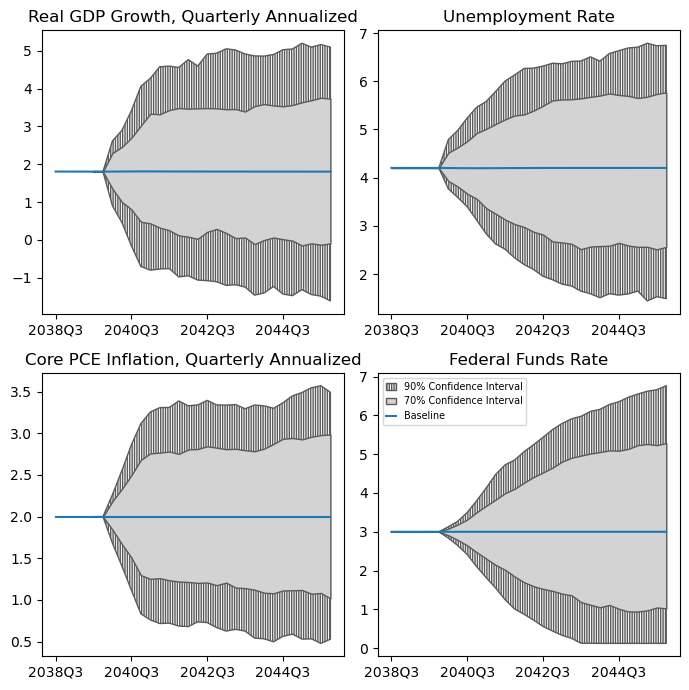

In [1]:
# example 5
from pyfrbus.frbus import Frbus
from pyfrbus.sim_lib import stochsim_plot
from pyfrbus.load_data import load_data
 
 
# Load data
data = load_data("data/LONGBASE.TXT")
 
# Load model
frbus = Frbus("models/model.xml")
 
# Specify dates and other params
residstart = "1975q1"
residend = "2018q4"
simstart = "2040q1"
simend = "2045q4"
# Number of replications
nrepl = 1000
# Run up to 5 extra replications, in case of failures
nextra = 5
 
# Policy settings
data.loc[simstart:simend, "dfpdbt"] = 0
data.loc[simstart:simend, "dfpsrp"] = 1
 
# Compute add factors
# Both for baseline tracking and over history, to be used as shocks
with_adds = frbus.init_trac(residstart, simend, data)
 
# Call FRBUS stochsim procedure
solutions = frbus.stochsim(
    nrepl, with_adds, simstart, simend, residstart, residend, nextra=nextra
)
 
stochsim_plot(with_adds, solutions, simstart, simend)